<a href="https://www.kaggle.com/code/brittanywingard/wta-player-analysis-breaking-into-the-top-10?scriptVersionId=107231702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

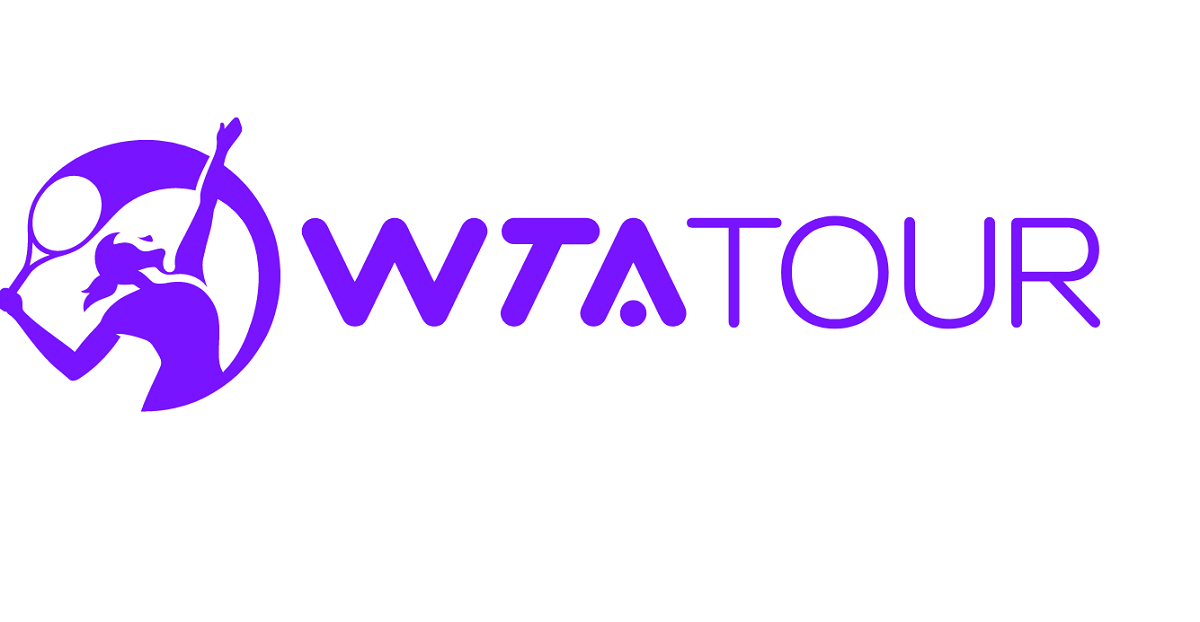

#  WTA Player Analysis

Brittany Wingard <br>
August 2022


## What does it take to break into the top 10? Are there any characteristcs that set these players apart?

In the following analysis, I will be following the top 10 ranked WTA players from 2017 until mid-July 2022 to see what characteristics they have that sets them apart from other players. 

We’ll take a closer look at the following features:
1. Experience: Does age play a factor?
1. Mental Toughness: Do these players have a higher capability to comeback after losing the first set?
1. Serves: How important are serves within a match?

…let’s take a closer look!


#### Notes about the dataset
Data focuses on tournaments with draw sizes is over 30.  This captures: 
1. Grand Slams (2,000 points)
1. WTA 1000 
1. WTA 500 
1. WTA 250
1. WTA 125

The data utilized for this analysis was based on the WTA data collected and organized by Jeff Sackmann on his Gethub page: https://github.com/JeffSackmann/tennis_wta
A huge shout out to him for making this analysis possible!



In [1]:
#Importing packages
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os


import warnings
warnings.filterwarnings('ignore')

In [2]:
from subprocess import check_output
print(check_output(["ls", "/kaggle/input/2017mid-july-2022-wta-matches"]).decode("utf8"))

wta_matches_2017.csv
wta_matches_2018.csv
wta_matches_2019.csv
wta_matches_2020.csv
wta_matches_2021.csv
wta_matches_2022.csv



In [3]:
os.getcwd()

'/kaggle/working'

In [4]:

path = r"/kaggle/input/2017mid-july-2022-wta-matches/"
os.chdir(path)
filenames =  os.listdir(path)
df = pd.DataFrame()

for filename in sorted(filenames)[1:]:
    try:
	    read_filename = path + filename
	    temp = pd.read_csv(read_filename,encoding='utf8')
	    frame = [df,temp]
	    df = pd.concat(frame)
    except UnicodeDecodeError:
        pass
path = r"/kaggle/working/"
os.chdir(path)


In [5]:
#taking a look at df
df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-0300,Luxembourg,Hard,32,I,20181015,270,202469,2.0,NaN,...,35.0,23.0,13.0,10.0,3.0,5.0,13.0,3225.0,81.0,735.0
1,2018-0300,Luxembourg,Hard,32,I,20181015,271,215035,NaN,SE,...,90.0,50.0,26.0,16.0,16.0,21.0,66.0,870.0,168.0,340.0
2,2018-0300,Luxembourg,Hard,32,I,20181015,272,203435,NaN,NaN,...,68.0,46.0,15.0,15.0,11.0,15.0,79.0,778.0,106.0,577.0
3,2018-0300,Luxembourg,Hard,32,I,20181015,273,202506,NaN,NaN,...,25.0,11.0,21.0,10.0,3.0,8.0,124.0,493.0,45.0,1164.0
4,2018-0300,Luxembourg,Hard,32,I,20181015,274,201465,9.0,NaN,...,34.0,21.0,3.0,8.0,5.0,9.0,52.0,1058.0,113.0,539.0


In [6]:
#making a copy
df_orig = df.copy()
df_orig.shape

(11092, 49)

In [7]:
#only focusing on tournments with draw sizes larger than 30
df = df.loc[(df['draw_size'] >= 30)]

In [8]:
#lets check
df['draw_size'].value_counts()

32     4795
128    2856
64     2122
96      190
30       58
54       51
Name: draw_size, dtype: int64

In [9]:
df.shape

(10072, 49)

In [10]:
#taking out the olympics games as they do not fall under "routine" tournaments
df = df.loc[(df['tourney_level'] != 'O')]
df.shape

(10008, 49)

In [11]:
#let's check null values
df.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           5583
winner_entry          8504
winner_name              0
winner_hand              0
winner_ht              444
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            7461
loser_entry           7646
loser_name               0
loser_hand               0
loser_ht               845
loser_ioc                0
loser_age                0
score                    0
best_of                  0
round                    0
minutes                209
w_ace                  204
w_df                   204
w_svpt                 204
w_1stIn                204
w_1stWon               204
w_2ndWon               204
w_SvGms                203
w_bpSaved              204
w_bpFaced              204
l_ace                  204
l

In [12]:
#There are certain columns that I'm not including in my analysis. Let's drop them.

df = df.drop(['winner_seed', 'winner_entry', 'winner_hand','loser_seed',
         'loser_entry', 'loser_hand', 'best_of','winner_ht', 'loser_ht'], axis=1)
df.shape

(10008, 40)

In [13]:
#lets take a look with remaining nulls
df.isnull().sum()

tourney_id              0
tourney_name            0
surface                 0
draw_size               0
tourney_level           0
tourney_date            0
match_num               0
winner_id               0
winner_name             0
winner_ioc              0
winner_age              0
loser_id                0
loser_name              0
loser_ioc               0
loser_age               0
score                   0
round                   0
minutes               209
w_ace                 204
w_df                  204
w_svpt                204
w_1stIn               204
w_1stWon              204
w_2ndWon              204
w_SvGms               203
w_bpSaved             204
w_bpFaced             204
l_ace                 204
l_df                  204
l_svpt                204
l_1stIn               204
l_1stWon              204
l_2ndWon              204
l_SvGms               203
l_bpSaved             204
l_bpFaced             204
winner_rank            14
winner_rank_points     14
loser_rank  

In [14]:
#For the remainig missing values within df, let's drop them. 
df = df.dropna()
df.shape

(9695, 40)

In [15]:
#lets check out the date d.type and see if changing to datetime is needed
df['tourney_date'].dtype

dtype('int64')

In [16]:
#needed and transforming 'tourney_date' columns
df['tourney_date'] = pd.to_datetime(df['tourney_date'].astype(str), format ='%Y%m%d' )
df['tourney_date'].dtypes

dtype('<M8[ns]')

In [17]:
#adding year in df
df['year'] = df['tourney_date'].dt.year
df.head(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,23.0,13.0,10.0,3.0,5.0,13.0,3225.0,81.0,735.0,2018
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,50.0,26.0,16.0,16.0,21.0,66.0,870.0,168.0,340.0,2018


In [18]:
#Let's categorize if player is within top 10 rank at time of match
df['winner_rank'].max()

1168.0

In [19]:
df['loser_rank'].max()

1476.0

In [20]:
df['winner_rank'].min()

1.0

In [21]:
df['loser_rank'].min()

1.0

In [22]:
#Adding condition: Is the player who WON ranked top 10 at time of match?
conditions = [
    (df['winner_rank'] > 10.0),
    (df['winner_rank'] <= 10.0),
    ]

values = ['No', 'Yes',]
df['istop10_winner'] = np.select(conditions, values)
df.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,istop10_winner
2115,2021-300,Luxembourg,Hard,32,I,2021-09-13,293,202505,Belinda Bencic,SUI,...,7.0,8.0,8.0,13.0,12.0,3820.0,105.0,756.0,2021,No
223,2021-580,Australian Open,Hard,128,G,2021-02-08,130,221103,Cori Gauff,USA,...,7.0,8.0,0.0,3.0,48.0,1423.0,58.0,1206.0,2021,No
2122,2021-300,Luxembourg,Hard,32,I,2021-09-13,286,210722,Elise Mertens,BEL,...,10.0,14.0,11.0,18.0,16.0,3140.0,111.0,740.0,2021,No
1173,2021-520,Roland Garros,Clay,128,G,2021-05-31,188,214461,Tamara Zidansek,SLO,...,1.0,8.0,1.0,6.0,85.0,920.0,84.0,990.0,2021,No
880,2019-1075,Wuhan,Hard,64,P,2019-09-23,280,214981,Elena Rybakina,KAZ,...,17.0,13.0,6.0,13.0,50.0,1078.0,54.0,1035.0,2019,No


In [23]:
#Adding condition: Is the player who LOST ranked top 10 at time of match?
conditions = [
    (df['loser_rank'] > 10.0),
    (df['loser_rank'] <= 10.0),
    ]

values = ['No', 'Yes',]
df['istop10_loser'] = np.select(conditions, values)

df.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser
1269,2021-2012,Berlin,Grass,32,P,2021-06-14,290,201458,Victoria Azarenka,BLR,...,10.0,1.0,5.0,16.0,3696.0,27.0,2320.0,2021,No,No
182,2019-0718,Dubai,Hard,64,P,2019-02-18,239,211701,Katerina Siniakova,CZE,...,9.0,8.0,12.0,44.0,1178.0,36.0,1355.0,2019,No,No
319,2019-0806,Toronto,Hard,64,P,2019-08-05,273,200033,Serena Williams,USA,...,9.0,5.0,10.0,10.0,3410.0,20.0,2180.0,2019,Yes,No
926,2022-709,Rome,Clay,64,P,2022-05-09,256,216153,Amanda Anisimova,USA,...,12.0,6.0,10.0,32.0,1525.0,53.0,1083.0,2022,No,No
215,2019-0718,Dubai,Hard,64,P,2019-02-18,279,202505,Belinda Bencic,SUI,...,7.0,2.0,7.0,45.0,1178.0,83.0,701.0,2019,No,No


In [24]:
df.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser
896,2020-0406,Strasbourg,Clay,32,I,2020-09-21,275,215020,Anna Blinkova,RUS,...,8.0,1.0,8.0,59.0,1104.0,294.0,204.0,2020,No,No
1028,2018-1080,Nottingham,Grass,32,I,2018-06-11,275,201586,Heather Watson,GBR,...,8.0,4.0,9.0,91.0,732.0,252.0,201.0,2018,No,No
1244,2018-1097,Budapest,Hard,32,I,2018-02-19,294,202421,Alison Van Uytvanck,BEL,...,9.0,4.0,7.0,80.0,822.0,34.0,1465.0,2018,No,No
789,2021-2033,Charleston 2,Clay,32,W,2021-04-12,296,203575,Danka Kovinic,MNE,...,9.0,3.0,8.0,65.0,1190.0,46.0,1598.0,2021,No,No
954,2021-709,Rome,Clay,64,PM,2021-05-10,283,221103,Cori Gauff,USA,...,10.0,9.0,14.0,35.0,1866.0,19.0,3130.0,2021,No,No


In [25]:
#Let's categorize the rankings of players per match
#first observing winner ranking

conditions = [
    ((df['winner_rank'] > 0) & (df['winner_rank'] <= 50.0)),
    ((df['winner_rank'] >= 51.0) & (df['winner_rank'] <= 100.0)),
    ((df['winner_rank'] >= 101.0) & (df['winner_rank'] <= 150.0)),
    ((df['winner_rank'] >= 151.0) & (df['winner_rank'] <= 200.0)),
    ((df['winner_rank'] >= 201.0) & (df['winner_rank'] <= 250.0)),
    ((df['winner_rank'] >= 251.0) & (df['winner_rank'] <= 300.0)),
    (df['winner_rank'] >= 301.0)
    ]

values = ['top50', 'top51-100', 'top101-150', 'top151-200','top201-250', 'top251-300', 'top300+']
df['winner_ranking'] = np.select(conditions, values)
df.head(5)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser,winner_ranking
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,3.0,5.0,13.0,3225.0,81.0,735.0,2018,No,No,top50
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,16.0,21.0,66.0,870.0,168.0,340.0,2018,No,No,top51-100
2,2018-0300,Luxembourg,Hard,32,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,...,11.0,15.0,79.0,778.0,106.0,577.0,2018,No,No,top51-100
3,2018-0300,Luxembourg,Hard,32,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,...,3.0,8.0,124.0,493.0,45.0,1164.0,2018,No,No,top101-150
4,2018-0300,Luxembourg,Hard,32,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,...,5.0,9.0,52.0,1058.0,113.0,539.0,2018,No,No,top51-100


In [26]:
#Same process with loser rankings
conditions = [
    ((df['loser_rank'] > 0) & (df['loser_rank'] <= 50.0)),
    ((df['loser_rank'] >= 51.0) & (df['loser_rank'] <= 100.0)),
    ((df['loser_rank'] >= 101.0) & (df['loser_rank'] <= 150.0)),
    ((df['loser_rank'] >= 151.0) & (df['loser_rank'] <= 200.0)),
    ((df['loser_rank'] >= 201.0) & (df['loser_rank'] <= 250.0)),
    ((df['loser_rank'] >= 251.0) & (df['loser_rank'] <= 300.0)),
    (df['loser_rank'] >= 301.0)
    ]

values = ['top50', 'top51-100', 'top101-150', 'top151-200','top201-250', 'top251-300', 'top300+']
df['loser_ranking'] = np.select(conditions, values)
df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,5.0,13.0,3225.0,81.0,735.0,2018,No,No,top50,top51-100
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,21.0,66.0,870.0,168.0,340.0,2018,No,No,top51-100,top151-200
2,2018-0300,Luxembourg,Hard,32,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,...,15.0,79.0,778.0,106.0,577.0,2018,No,No,top51-100,top101-150
3,2018-0300,Luxembourg,Hard,32,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,...,8.0,124.0,493.0,45.0,1164.0,2018,No,No,top101-150,top50
4,2018-0300,Luxembourg,Hard,32,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,...,9.0,52.0,1058.0,113.0,539.0,2018,No,No,top51-100,top101-150


In [27]:
#My final steps here are breaking up the score and dropping those values which are not needed

df['set1'], df['set2'], df['set3'] = df['score'].str.split(' ',2).str
df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking,set1,set2,set3
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,81.0,735.0,2018,No,No,top50,top51-100,6-4,6-4,NaN
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,168.0,340.0,2018,No,No,top51-100,top151-200,6-2,6-7(10),7-6(5)
2,2018-0300,Luxembourg,Hard,32,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,...,106.0,577.0,2018,No,No,top51-100,top101-150,7-6(3),3-6,6-4
3,2018-0300,Luxembourg,Hard,32,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,...,45.0,1164.0,2018,No,No,top101-150,top50,6-1,7-6(4),NaN
4,2018-0300,Luxembourg,Hard,32,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,...,113.0,539.0,2018,No,No,top51-100,top101-150,6-2,6-3,NaN


In [28]:
#lets check the values of the set columns
df.set1.unique()

array(['6-4', '6-2', '7-6(3)', '6-1', '7-6(8)', '6-3', '6-0', '4-6',
       '7-5', '2-6', '6-7(3)', '3-6', '5-7', '0-6', '7-6(4)', '7-6(2)',
       '6-7(5)', '1-6', '7-6(6)', '6-7(2)', '7-6(7)', '7-6(5)', '6-7(6)',
       '7-6(9)', '7-6(0)', 'W/O', '6-7(4)', '7-6(1)', '5-3', '6-7(0)',
       '7-6(10)', '4-1', '2-1', '6-7(9)', '2-0', '5-4', '1-3', '6-7(1)',
       '6-7(8)', '6-7(7)', '2-4', '3-1', '3-4', '4-0', '5-0', '4-3',
       '3-0', '6-7(10)', '4-4', '2-5', '6-7(13)', '3-2', '6-6', '2-3',
       '5-6', '7-6(11)', '5-2', '7-6', '3-3', '1-0', '7-6(12)', '5-1'],
      dtype=object)

In [29]:
df.set2.unique()

array(['6-4', '6-7(10)', '3-6', '7-6(4)', '6-3', '6-1', '5-7', '6-2',
       '6-7(5)', '7-6(6)', '7-5', '6-0', '4-0', '0-0', '7-6(3)', '7-6(1)',
       '4-6', '7-6(8)', '7-6(2)', '7-6(5)', '1-0', '2-6', '6-7(3)',
       '6-7(6)', '1-6', '6-7(2)', '3-0', '6-7(7)', '7-6(9)', '7-6(11)',
       '0-6', '4-1', '2-1', nan, '6-7(0)', '7-6(7)', '3-2', '2-0', '1-1',
       'RET', '6-7(8)', '3-3', '7-6(0)', '6-7(4)', '2-3', '6-7(1)',
       '7-6(10)', '4-2', '5-2', '3-1', '5-4', '4-3', '7-6(12)', '2-2',
       '6-5', '6-7(9)', '4-5', '0-1', '3-4', '1-2', '5-0', '0-2', '6-7'],
      dtype=object)

In [30]:
df.set3.unique()

array([nan, '7-6(5)', '6-4', '6-0', '7-5', 'RET', '6-3', '6-1', '6-2',
       '7-6(1)', '7-6(6)', '7-6(3)', '2-3 RET', '1-0 RET', '7-6(4)',
       '4-3 RET', '7-6(2)', '3-0 RET', '3-1 RET', '7-6(0)', '0-0 RET',
       '3-2 RET', '7-6(8)', '4-1 RET', '2-1 RET', '7-6(11)', '2-0 RET',
       '5-2 RET', '9-7', '8-6', '10-8', '15-13', '5-0 RET', '4-0 RET',
       '7-6(7)', '7-6(12)', '2-2 RET', '1-2 RET', '7-6(13)', '3-3 RET',
       '7-6(9)', '11-9', '13-11', '4-4 RET', '4-2 RET', '[10-6]',
       '[10-4]', '[11-9]', '6-6 RET', 'RET+H64', '5-1 RET'], dtype=object)

In [31]:
df.shape

(9695, 48)

In [32]:
#for this analysis, I'm going to exclude those valued at W/O, nan, as well as RET.

wta = df.loc[(df['set1'] != 'W/O') & 
                 (df['set2'].notnull()) & 
                 (df['set2'] != 'RET') & 
                 (df['set3'] != 'RET') &
                 (~df['set3'].str.contains('R', na=False))]
wta.shape


(9352, 48)

In [33]:
#cleaning up 3rd set column
wta['set3'].unique()


array([nan, '7-6(5)', '6-4', '6-0', '7-5', '6-3', '6-1', '6-2', '7-6(1)',
       '7-6(6)', '7-6(3)', '7-6(4)', '7-6(2)', '7-6(0)', '7-6(8)',
       '7-6(11)', '9-7', '8-6', '10-8', '15-13', '7-6(7)', '7-6(12)',
       '7-6(13)', '7-6(9)', '11-9', '13-11', '[10-6]', '[10-4]', '[11-9]'],
      dtype=object)

In [34]:
#wta["set3"] = wta["set3"].str.replace("[","")
wta["set3"] = wta["set3"].str.replace("]","")

In [35]:
wta['set3'].unique()

array([nan, '7-6(5)', '6-4', '6-0', '7-5', '6-3', '6-1', '6-2', '7-6(1)',
       '7-6(6)', '7-6(3)', '7-6(4)', '7-6(2)', '7-6(0)', '7-6(8)',
       '7-6(11)', '9-7', '8-6', '10-8', '15-13', '7-6(7)', '7-6(12)',
       '7-6(13)', '7-6(9)', '11-9', '13-11', '[10-6', '[10-4', '[11-9'],
      dtype=object)

In [36]:
wta.head(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,loser_rank,loser_rank_points,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking,set1,set2,set3
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,81.0,735.0,2018,No,No,top50,top51-100,6-4,6-4,NaN
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,168.0,340.0,2018,No,No,top51-100,top151-200,6-2,6-7(10),7-6(5)


In [37]:
#Now let's calulcate the type of win it was; "2nd set" or "3rd set"

wta['win_type'] = np.where(wta['set3'].isnull(), '2nd set win', '3rd set win')
wta.head(5)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,loser_rank_points,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking,set1,set2,set3,win_type
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,735.0,2018,No,No,top50,top51-100,6-4,6-4,NaN,2nd set win
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,340.0,2018,No,No,top51-100,top151-200,6-2,6-7(10),7-6(5),3rd set win
2,2018-0300,Luxembourg,Hard,32,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,...,577.0,2018,No,No,top51-100,top101-150,7-6(3),3-6,6-4,3rd set win
3,2018-0300,Luxembourg,Hard,32,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,...,1164.0,2018,No,No,top101-150,top50,6-1,7-6(4),NaN,2nd set win
4,2018-0300,Luxembourg,Hard,32,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,...,539.0,2018,No,No,top51-100,top101-150,6-2,6-3,NaN,2nd set win


In [38]:
#calculating if match is considered a comeback

def comeback (set1, set2):
    set1_left = int(set1.split('-')[0])
    set2_left = int(set2.split('-')[0])
    #set3_left = int(set3.split('-')[0])
    
    is_comeback = (set1_left < 6 & set2_left >= 6)
    #not_comeback = (set1_left >= 6 & set2_left >= 6) or (set3_left == null)
    return is_comeback

In [39]:
#testing function
comeback("1-6", "6-2")

True

In [40]:
#adding comeback column within df
wta['3rd_setcomeback'] = wta.apply(lambda x: comeback(x.set1, x.set2), axis=1)
wta.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking,set1,set2,set3,win_type,3rd_setcomeback
0,2018-0300,Luxembourg,Hard,32,I,2018-10-15,270,202469,Garbine Muguruza,ESP,...,2018,No,No,top50,top51-100,6-4,6-4,NaN,2nd set win,False
1,2018-0300,Luxembourg,Hard,32,I,2018-10-15,271,215035,Dayana Yastremska,UKR,...,2018,No,No,top51-100,top151-200,6-2,6-7(10),7-6(5),3rd set win,False
2,2018-0300,Luxembourg,Hard,32,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,...,2018,No,No,top51-100,top101-150,7-6(3),3-6,6-4,3rd set win,False
3,2018-0300,Luxembourg,Hard,32,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,...,2018,No,No,top101-150,top50,6-1,7-6(4),NaN,2nd set win,False
4,2018-0300,Luxembourg,Hard,32,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,...,2018,No,No,top51-100,top101-150,6-2,6-3,NaN,2nd set win,False


In [41]:
wta.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_ioc,...,year,istop10_winner,istop10_loser,winner_ranking,loser_ranking,set1,set2,set3,win_type,3rd_setcomeback
73,2020-1063,Shenzhen,Hard,32,I,2020-01-06,287,201435,Kateryna Bondarenko,UKR,...,2020,No,No,top300+,top50,7-6(8),6-3,NaN,2nd set win,False
841,2022-1038,Madrid,Clay,64,P,2022-04-28,281,214082,Daria Kasatkina,RUS,...,2022,No,Yes,top50,top50,3-6,6-3,6-1,3rd set win,True
1842,2019-580,Australian Open,Hard,128,G,2019-01-14,190,205925,Aliaksandra Sasnovich,BLR,...,2019,No,No,top50,top50,6-3,6-3,NaN,2nd set win,False
701,2022-894,Bogota,Clay,32,I,2022-04-04,277,202464,Yuliana Lizarazo,COL,...,2022,No,No,top300+,top51-100,4-6,7-6(1),6-2,3rd set win,True
59,2018-0405,Hiroshima,Hard,32,I,2018-09-10,298,201444,Su Wei Hsieh,TPE,...,2018,No,No,top50,top50,6-4,6-4,NaN,2nd set win,False


In [42]:
wta.shape

(9352, 50)

In [43]:
wta_copy = wta.copy()
wta_copy.shape

(9352, 50)

In [44]:
wta.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_ioc',
       'winner_age', 'loser_id', 'loser_name', 'loser_ioc', 'loser_age',
       'score', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points', 'year', 'istop10_winner',
       'istop10_loser', 'winner_ranking', 'loser_ranking', 'set1', 'set2',
       'set3', 'win_type', '3rd_setcomeback'],
      dtype='object')

In [45]:
#Now, let's split the df into 2 seperate dfs and then concate them

winners = wta[['tourney_id', 'tourney_name', 'surface','tourney_level','tourney_date',
               'match_num', 'winner_id','winner_name', 'winner_ioc','winner_age','score','round',
               'minutes', 'w_ace', 'w_df', 'w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms',
               'w_bpSaved','w_bpFaced', 'winner_rank','winner_rank_points','year', 'istop10_winner',
               'winner_ranking','set1','set2', 'set3','win_type','3rd_setcomeback']]

#winners.head(5)
winners.shape


(9352, 32)

In [46]:
#Renaming columns to concat later

winners.rename(columns={'winner_id': 'player_id', 'winner_name': 'player_name',
                        'winner_ioc': 'country','winner_age': 'player_age', 'w_ace': 'aces',
                        'w_df':'df', 'w_svpt': 'svpt', 'w_1stIn': '1stIn', 'w_1stWon':'1stWon',
                        'w_2ndWon': '2ndWon', 'w_SvGms': 'SvGms', 'w_bpSaved':'bpSaved',
                        'w_bpFaced': 'bpFaced', 'winner_rank':'player_rank', 'winner_rank_points': 'points',
                        'istop10_winner': 'istop10', 'winner_ranking': 'rank_category'},inplace=True)
winners.columns

Index(['tourney_id', 'tourney_name', 'surface', 'tourney_level',
       'tourney_date', 'match_num', 'player_id', 'player_name', 'country',
       'player_age', 'score', 'round', 'minutes', 'aces', 'df', 'svpt',
       '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'player_rank', 'points', 'year', 'istop10', 'rank_category', 'set1',
       'set2', 'set3', 'win_type', '3rd_setcomeback'],
      dtype='object')

In [47]:
winners['result'] = 'win'
winners.head(5)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,country,player_age,...,points,year,istop10,rank_category,set1,set2,set3,win_type,3rd_setcomeback,result
0,2018-0300,Luxembourg,Hard,I,2018-10-15,270,202469,Garbine Muguruza,ESP,25.0,...,3225.0,2018,No,top50,6-4,6-4,NaN,2nd set win,False,win
1,2018-0300,Luxembourg,Hard,I,2018-10-15,271,215035,Dayana Yastremska,UKR,18.4,...,870.0,2018,No,top51-100,6-2,6-7(10),7-6(5),3rd set win,False,win
2,2018-0300,Luxembourg,Hard,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,27.5,...,778.0,2018,No,top51-100,7-6(3),3-6,6-4,3rd set win,False,win
3,2018-0300,Luxembourg,Hard,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,24.1,...,493.0,2018,No,top101-150,6-1,7-6(4),NaN,2nd set win,False,win
4,2018-0300,Luxembourg,Hard,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,32.7,...,1058.0,2018,No,top51-100,6-2,6-3,NaN,2nd set win,False,win


In [48]:
winners.shape

(9352, 33)

In [49]:
wta.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_ioc',
       'winner_age', 'loser_id', 'loser_name', 'loser_ioc', 'loser_age',
       'score', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points', 'year', 'istop10_winner',
       'istop10_loser', 'winner_ranking', 'loser_ranking', 'set1', 'set2',
       'set3', 'win_type', '3rd_setcomeback'],
      dtype='object')

In [50]:
#same process for losers

losers = wta[['tourney_id', 'tourney_name', 'surface','tourney_level','tourney_date',
               'match_num', 'loser_id','loser_name', 'loser_ioc','loser_age','score','round',
               'minutes', 'l_ace', 'l_df', 'l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms',
               'l_bpSaved','l_bpFaced', 'loser_rank','loser_rank_points','year', 'istop10_loser',
               'loser_ranking','set1','set2', 'set3','win_type','3rd_setcomeback']]

#losers.head(5)
losers.shape



(9352, 32)

In [51]:
#Renaming columns to concat 

losers.rename(columns={'loser_id': 'player_id', 'loser_name': 'player_name',
                        'loser_ioc': 'country','loser_age': 'player_age', 'l_ace': 'aces',
                        'l_df':'df', 'l_svpt': 'svpt', 'l_1stIn': '1stIn', 'l_1stWon':'1stWon',
                        'l_2ndWon': '2ndWon', 'l_SvGms': 'SvGms', 'l_bpSaved':'bpSaved',
                        'l_bpFaced': 'bpFaced', 'loser_rank':'player_rank', 'loser_rank_points': 'points',
                        'istop10_loser': 'istop10', 'loser_ranking': 'rank_category'},inplace=True)
losers.columns

Index(['tourney_id', 'tourney_name', 'surface', 'tourney_level',
       'tourney_date', 'match_num', 'player_id', 'player_name', 'country',
       'player_age', 'score', 'round', 'minutes', 'aces', 'df', 'svpt',
       '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'player_rank', 'points', 'year', 'istop10', 'rank_category', 'set1',
       'set2', 'set3', 'win_type', '3rd_setcomeback'],
      dtype='object')

In [52]:
losers['result'] = 'loss'

In [53]:
losers.shape

(9352, 33)

In [54]:
#now let's concat again
players = pd.concat([winners, losers], axis=0)
players.head(5)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,country,player_age,...,points,year,istop10,rank_category,set1,set2,set3,win_type,3rd_setcomeback,result
0,2018-0300,Luxembourg,Hard,I,2018-10-15,270,202469,Garbine Muguruza,ESP,25.0,...,3225.0,2018,No,top50,6-4,6-4,NaN,2nd set win,False,win
1,2018-0300,Luxembourg,Hard,I,2018-10-15,271,215035,Dayana Yastremska,UKR,18.4,...,870.0,2018,No,top51-100,6-2,6-7(10),7-6(5),3rd set win,False,win
2,2018-0300,Luxembourg,Hard,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,27.5,...,778.0,2018,No,top51-100,7-6(3),3-6,6-4,3rd set win,False,win
3,2018-0300,Luxembourg,Hard,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,24.1,...,493.0,2018,No,top101-150,6-1,7-6(4),NaN,2nd set win,False,win
4,2018-0300,Luxembourg,Hard,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,32.7,...,1058.0,2018,No,top51-100,6-2,6-3,NaN,2nd set win,False,win


In [55]:
players.shape

(18704, 33)

In [56]:
players.columns

Index(['tourney_id', 'tourney_name', 'surface', 'tourney_level',
       'tourney_date', 'match_num', 'player_id', 'player_name', 'country',
       'player_age', 'score', 'round', 'minutes', 'aces', 'df', 'svpt',
       '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced',
       'player_rank', 'points', 'year', 'istop10', 'rank_category', 'set1',
       'set2', 'set3', 'win_type', '3rd_setcomeback', 'result'],
      dtype='object')

In [57]:
#Now I'm going to merge the CURRENT rankings df into this current one

#importing current rankings as of July 18 2022
rankings = pd.read_csv(r"/kaggle/input/wta-rankings-current/wta_rankings_current.csv")
rankings.head(5)


,ranking_date,rank,player,points,tours
0,20220103,1,202458,7582,16
1,20220103,2,214544,6380,20
2,20220103,3,202469,5685,21
3,20220103,4,201662,5135,19
4,20220103,5,206252,5008,29


In [58]:
#renaming columns
rankings.rename(columns={'player': 'player_id', 'rank': 'rank_current'}, inplace=True)
rankings.head(2)

,ranking_date,rank_current,player_id,points,tours
0,20220103,1,202458,7582,16
1,20220103,2,214544,6380,20


In [59]:
rankings.columns


Index(['ranking_date', 'rank_current', 'player_id', 'points', 'tours'], dtype='object')

In [60]:
rankings['ranking_date'] = pd.to_datetime(rankings['ranking_date'].astype(str), format='%Y%m%d')
rankings.head(2)


,ranking_date,rank_current,player_id,points,tours
0,2022-01-03,1,202458,7582,16
1,2022-01-03,2,214544,6380,20


In [61]:
#last date within df
rankings_current = rankings.loc[(rankings['ranking_date'] == '2022-07-18')]
rankings_current.head(5)

,ranking_date,rank_current,player_id,points,tours
40600,2022-07-18,1,216347,8336,15
40601,2022-07-18,2,204426,4326,19
40602,2022-07-18,3,206289,4190,20
40603,2022-07-18,4,211651,4030,24
40604,2022-07-18,5,202460,4010,18


In [62]:
#merging rankings_current df with players df

players = pd.merge(players,
                     rankings_current[['player_id', 'rank_current']], on = 'player_id', how ='left')
                                                
players.head(5)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,country,player_age,...,year,istop10,rank_category,set1,set2,set3,win_type,3rd_setcomeback,result,rank_current
0,2018-0300,Luxembourg,Hard,I,2018-10-15,270,202469,Garbine Muguruza,ESP,25.0,...,2018,No,top50,6-4,6-4,NaN,2nd set win,False,win,9.0
1,2018-0300,Luxembourg,Hard,I,2018-10-15,271,215035,Dayana Yastremska,UKR,18.4,...,2018,No,top51-100,6-2,6-7(10),7-6(5),3rd set win,False,win,79.0
2,2018-0300,Luxembourg,Hard,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,27.5,...,2018,No,top51-100,7-6(3),3-6,6-4,3rd set win,False,win,250.0
3,2018-0300,Luxembourg,Hard,I,2018-10-15,273,202506,Margarita Gasparyan,RUS,24.1,...,2018,No,top101-150,6-1,7-6(4),NaN,2nd set win,False,win,NaN
4,2018-0300,Luxembourg,Hard,I,2018-10-15,274,201465,Kirsten Flipkens,BEL,32.7,...,2018,No,top51-100,6-2,6-3,NaN,2nd set win,False,win,185.0


In [63]:
players.shape

(18704, 34)

In [64]:
players.head(3)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,player_id,player_name,country,player_age,...,year,istop10,rank_category,set1,set2,set3,win_type,3rd_setcomeback,result,rank_current
0,2018-0300,Luxembourg,Hard,I,2018-10-15,270,202469,Garbine Muguruza,ESP,25.0,...,2018,No,top50,6-4,6-4,NaN,2nd set win,False,win,9.0
1,2018-0300,Luxembourg,Hard,I,2018-10-15,271,215035,Dayana Yastremska,UKR,18.4,...,2018,No,top51-100,6-2,6-7(10),7-6(5),3rd set win,False,win,79.0
2,2018-0300,Luxembourg,Hard,I,2018-10-15,272,203435,Dalila Jakupovic,SLO,27.5,...,2018,No,top51-100,7-6(3),3-6,6-4,3rd set win,False,win,250.0


Let's now check for outliers. For my analysis I'll be focusing on the following numeric columns:
1. Aces
1. Break points saved
1. Service Games Won

In [65]:
#Creating boxplot for other columns for potential outliers
cols = ['aces','bpSaved', 'SvGms']

# Unpivot or melt the dataframe
df_melt = pd.melt(players, id_vars=['player_id'], 
                  value_vars= cols, 
                  var_name='variable', 
                  value_name='point')

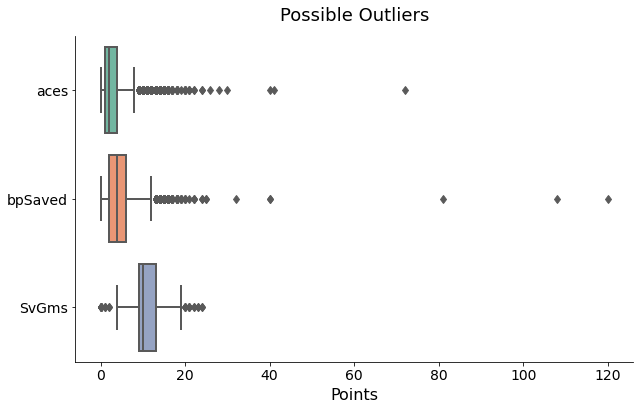

In [66]:
# Set the figure width and height
plt.figure(figsize = (10,6))

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title('Possible Outliers', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

Let's take a look more closely at aces. 

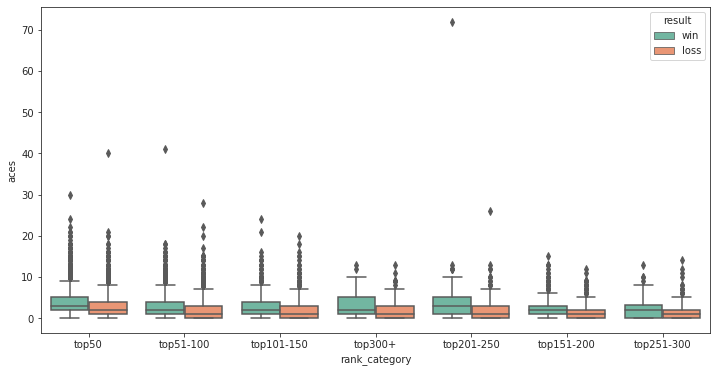

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='rank_category', y='aces', 
            hue='result', palette='Set2', data=players, ax=ax)
plt.show()

There appears to be some outliers present. Looking at our time frame, 2017 to July 2022, the highest recored aces in a single match have been 28. https://www.wtatennis.com/photos/1871011/super-servers-the-most-aces-fired-in-a-singe-match-since-2008

Lets refilter this number out.

In [68]:
players_copy_01 = players.copy()

In [69]:
players.shape

(18704, 34)

In [70]:
players_copy_01.shape

(18704, 34)

In [71]:
#filtering out outliers for aces
players = players.loc[(players['aces'] <= 28)]

In [72]:
players.shape

(18700, 34)

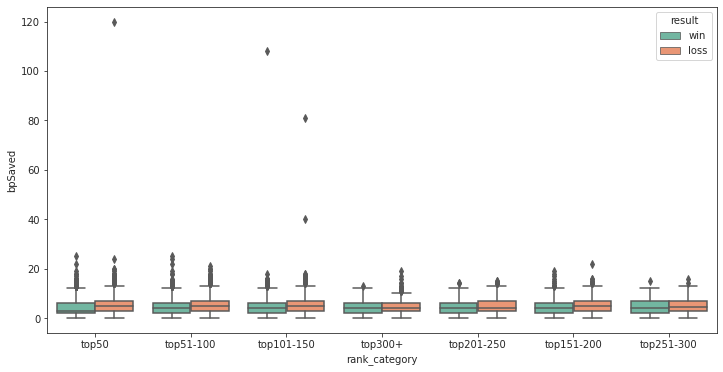

In [73]:
#Observing breakpoints saved

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='rank_category', y='bpSaved', 
            hue='result', palette='Set2', data=players, ax=ax)
plt.show()

There are 3 noticiable outliers ranging 40 and over. Saving over 40 breakpoints seems nearly impossible within a match. I'm going to filter these out.

In [74]:
players = players.loc[(players['bpSaved'] <= 39)]

In [75]:
players.shape

(18696, 34)

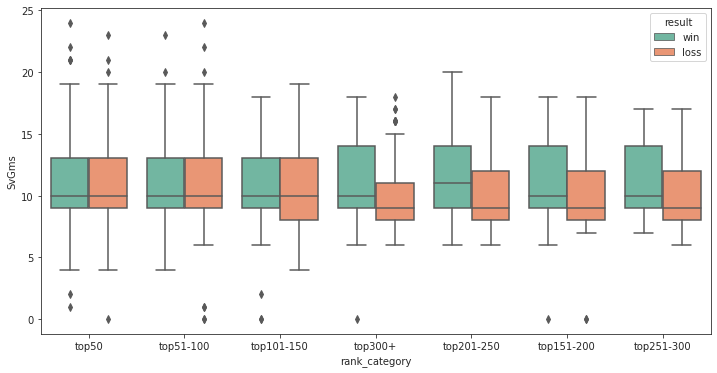

In [76]:
#Observing Service Games Won 

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='rank_category', y='SvGms', 
            hue='result', palette='Set2', data=players, ax=ax)
plt.show()

No abnormal outliers are sticking out for service games won. 

## EDA completed
As a review, here's what was completed:

#### Data Cleaning
1. Removed matches that belonged to draw sizes 30 and under
1. Updated the match date column and added the year

#### Feature Engineering
1. Added classifaction for top 10 at the time of the match as rankings change throughout the year
1. The overall rank category at the time of the match
1. Breaking up the set scores and determining the type of win
1. Determining if match was a comeback or not

#### Join Dataset
1. Joined another dataset to get the current status of rankings 




From here, I'm going to export this data to an xlsx format as I would like to create some graphs via Tableau. 

In [77]:
# determining the name of the file
wta_players = 'wtaplayers.xlsx'
  
# saving the excel
players.to_excel(wta_players)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


WTA rankings are based off of points earned the further they progress throughout tournaments. As we can see from the below chart, the highest earned points are found with those with the top rankings.

In [78]:
px.scatter(players, x='player_rank', y='points', title ='Player ranking compared to points')


Emma Raducanu is a great example of how points highly affect players rank. Emma  was a qualifier player in the US Open in 2021 and ended up winning the finals! Just in 2021, her ranking jumped from being in the 300s  to the top 50. 


In [79]:
fig = px.line(players[players['player_name'] == 'Emma Raducanu'], x="player_rank",y ='points',color = 'year',
                 text = 'year', title = 'Emma Raducanus breakthrough into the top 10')
fig.update_traces(textposition="bottom right")
fig.show()

The below graph represents the count of matches categorized by each ranking. We can observe here that the top50 catgory is more representative since within our dataset, more matches are played for players ranked with highest ratings. 

In [80]:
fig = px.bar(players, x='rank_category',color = 'result', title = 'Rank category to Match Result')
fig.update_traces(dict(marker_line_width=0))
fig.show()

So, who is in the top 10?
(Keep in mind that this data is used from July 18, 2022.)





In [81]:
players.pivot_table(index = 'player_name',
                               values = 'rank_current').sort_values(by = 'rank_current', ascending = True).head(10)

,rank_current
player_name,
Iga Swiatek,1.0
Anett Kontaveit,2.0
Maria Sakkari,3.0
Paula Badosa,4.0
Ons Jabeur,5.0
Aryna Sabalenka,6.0
Jessica Pegula,7.0
Danielle Collins,8.0
Garbine Muguruza,9.0


#### Circling back to the initial question... 
### What does it take to break into the top 10? Are there any characteristics that set them apart?

### 1. Experience
Does experience have any impact on a players ranking? Meaning those players who are older, having more match experience tend to be ranked higher?

…let’s find out! 





In [82]:
players["player_age"].mean().round(2)

25.99

We find players overall average age being **25.93**. 

In [83]:
age = players.pivot_table(index = 'rank_category',
                        values = 'player_age',
                        aggfunc = np.mean).round(2).reset_index().sort_values(by = 'player_age', ascending = False)

#age.plot(x='rank_category', kind='bar', width= 0.8)
age

,rank_category,player_age
6,top51-100,26.25
5,top50,26.22
0,top101-150,25.43
1,top151-200,25.26
3,top251-300,25.16
2,top201-250,24.92
4,top300+,24.74


In [84]:
fig = px.bar(age, y='player_age', x='rank_category',text="player_age",
            title="Age Distribution across ranking categories")
fig.show()

In [85]:
players.pivot_table(index = 'istop10',
                        values = 'player_age',
                        aggfunc = np.mean).round(2).reset_index()

,istop10,player_age
0,No,25.97
1,Yes,26.21


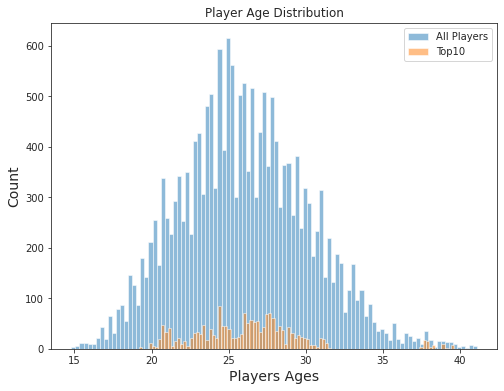

In [86]:
top10df = players.loc[(players['istop10'] == 'Yes')]
df1 = players['player_age']
df2 = top10df['player_age']


plt.figure(figsize=(8,6))
plt.hist(df1, bins=100, alpha=0.5, label="All Players")
plt.hist(df2, bins=100, alpha=0.5, label="Top10")
plt.xlabel("Players Ages", size=14)
plt.ylabel("Count", size=14)
plt.title("Player Age Distribution")
plt.legend(loc='upper right')


According to the data present, there is a **slight** difference among ages and ranking, that being those better ranked tend to be **slightly older**. 

## 2. Mental Toughness
While there can be many factors that could influence a players mental toughness, below are the measurements that were analyzed:

1. 3rd set comebacks
1. Breakpoints Saved

Can we distinguish these unique features among the top 10?


When players enter the 3rd and final set of the match…what are the outcomes?


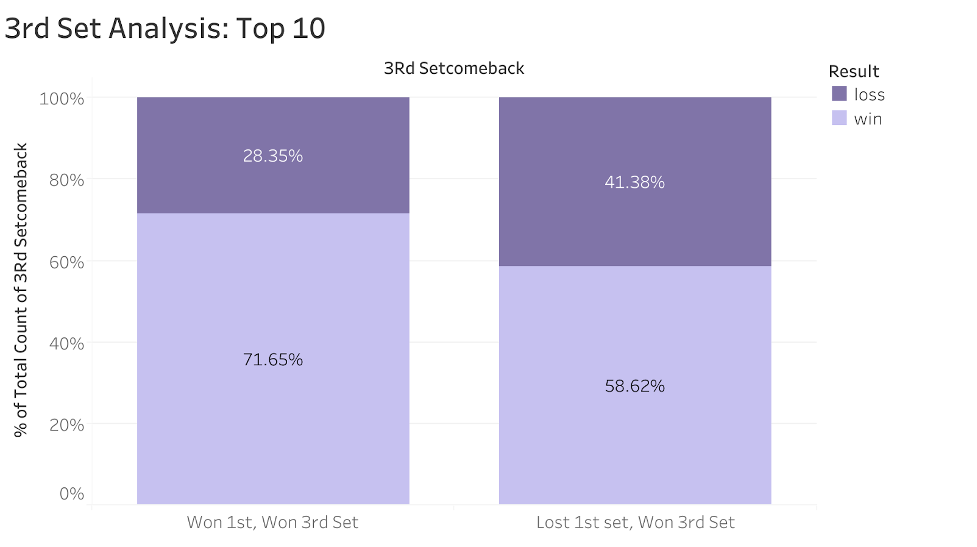

Taking a look at the top 10 players:
- About 72% of Top 10 players have ended up winning the 1st set in a 3 set match.
- If they lose the 1st set, 59% have been able to comeback to win. 

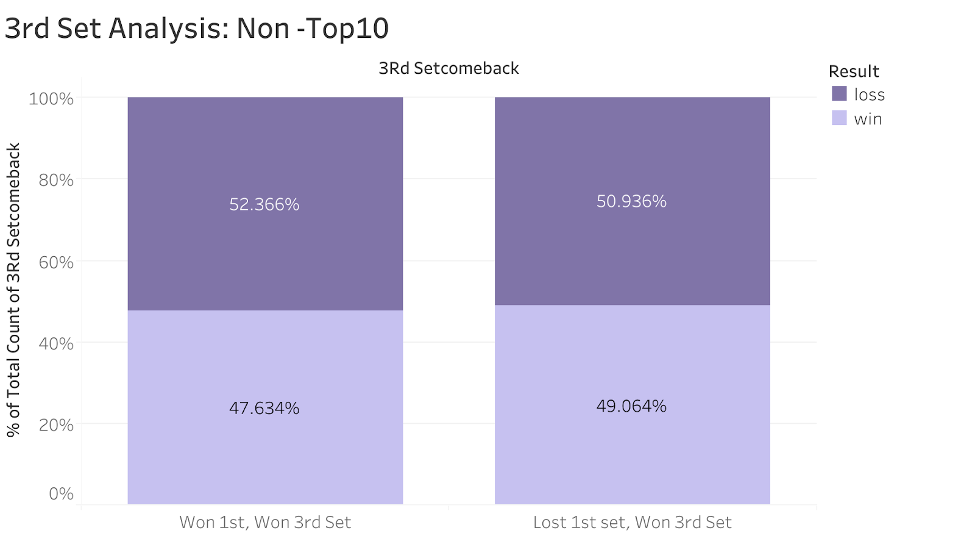

Non-Top 10 Players:
- 48% of Non -Top 10 players that ended up winning the 1st set, won the 3rd set
- 49% of players have been able to comeback to win the 3rd set


#### Mental Toughness: Breakpoints Saved <br>
Breakpoints are very pressuresome moments through a match both for the service and non-service player. The ability to break a serve puts players a much better advantage to set themselves up for aggressive plays. The ability to save these points demonstrates a very high level of mental resilience. 


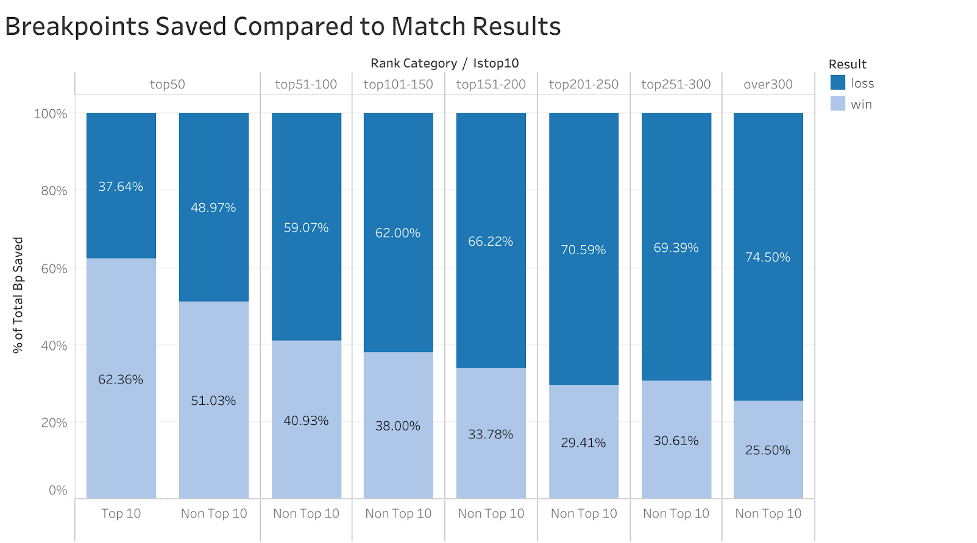

Looking at our top 10 ranked players, 62% of the number of breakpoints saved were evident in a match win. This is a difference of about 10% with the remaining players within the top 50. 

## 3. Serves 
Players serving capability has been argued to be one of the most important features when looking at the outcome of a match. Let’s take a look at the following to see how true this is:

1. Number of 
1. Number of service games won


Aces are types of services in which the opponent doesn't make contact with the ball. Aces results in the point being won. 

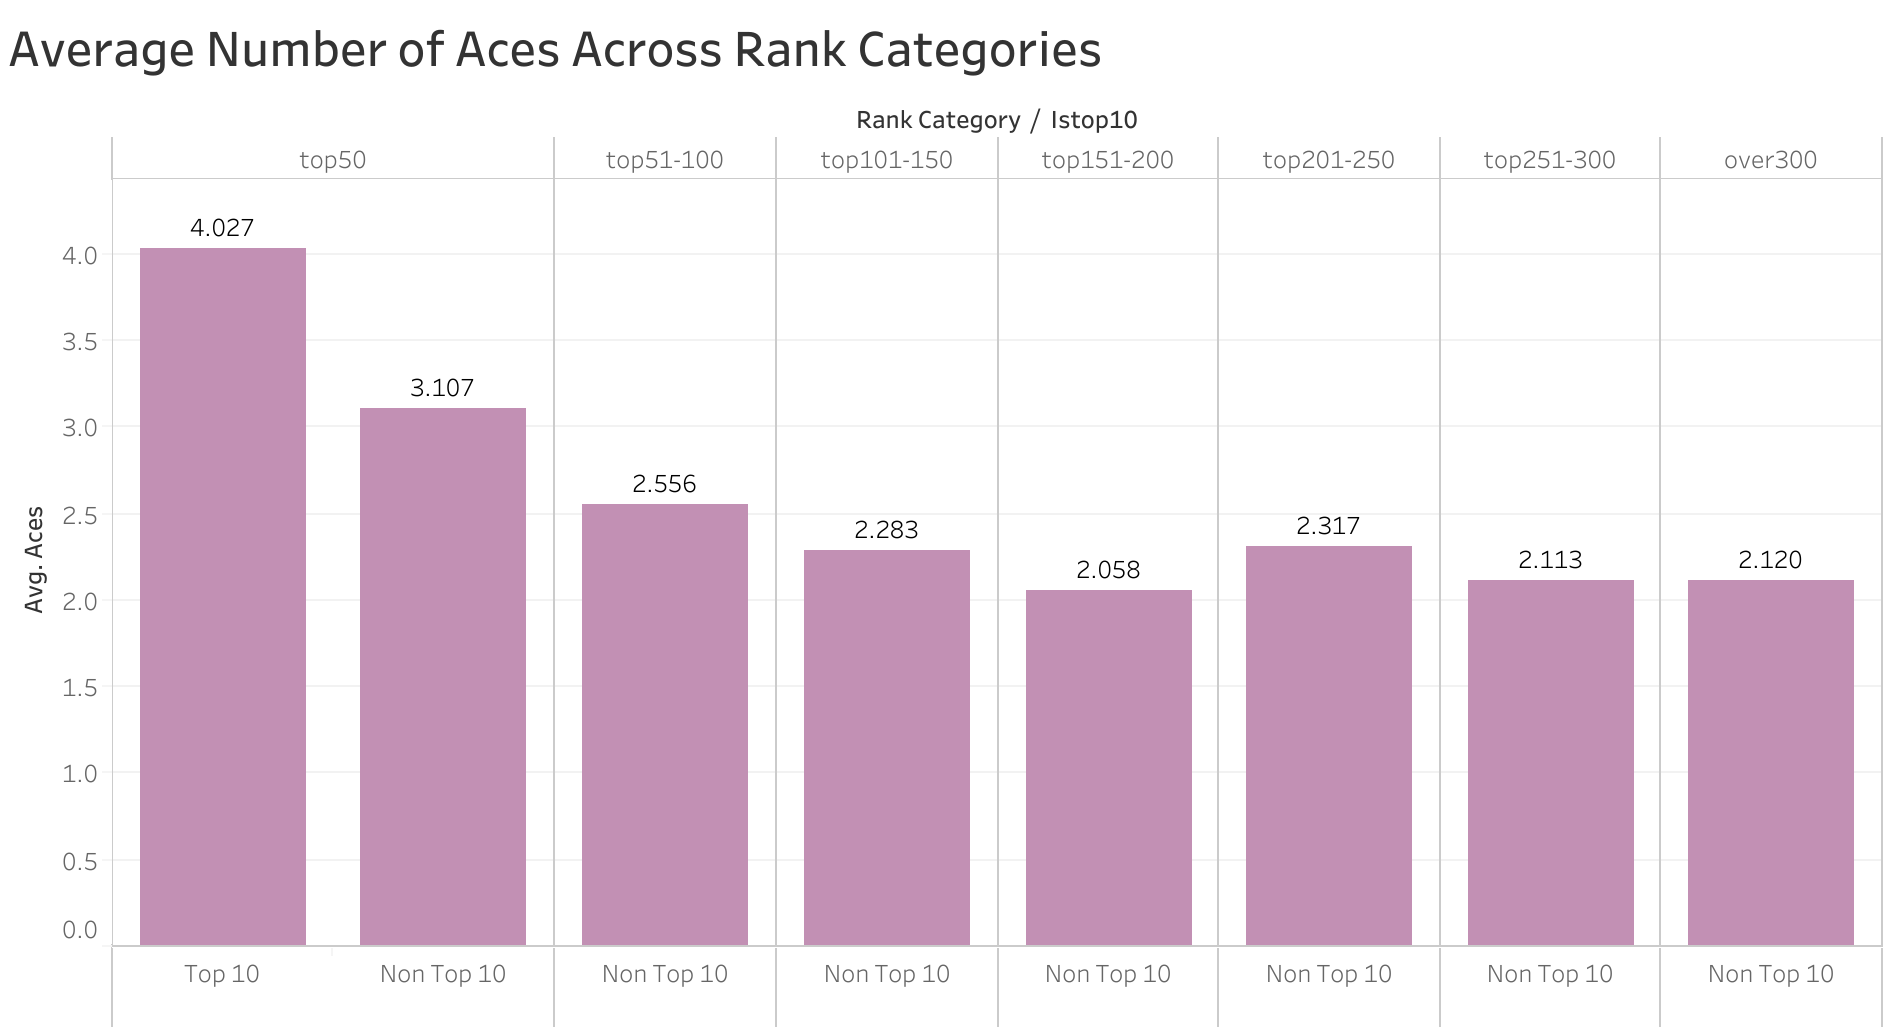

We can find the highest average of aces within the top 10 ranked players averaging about **4 aces each match**.

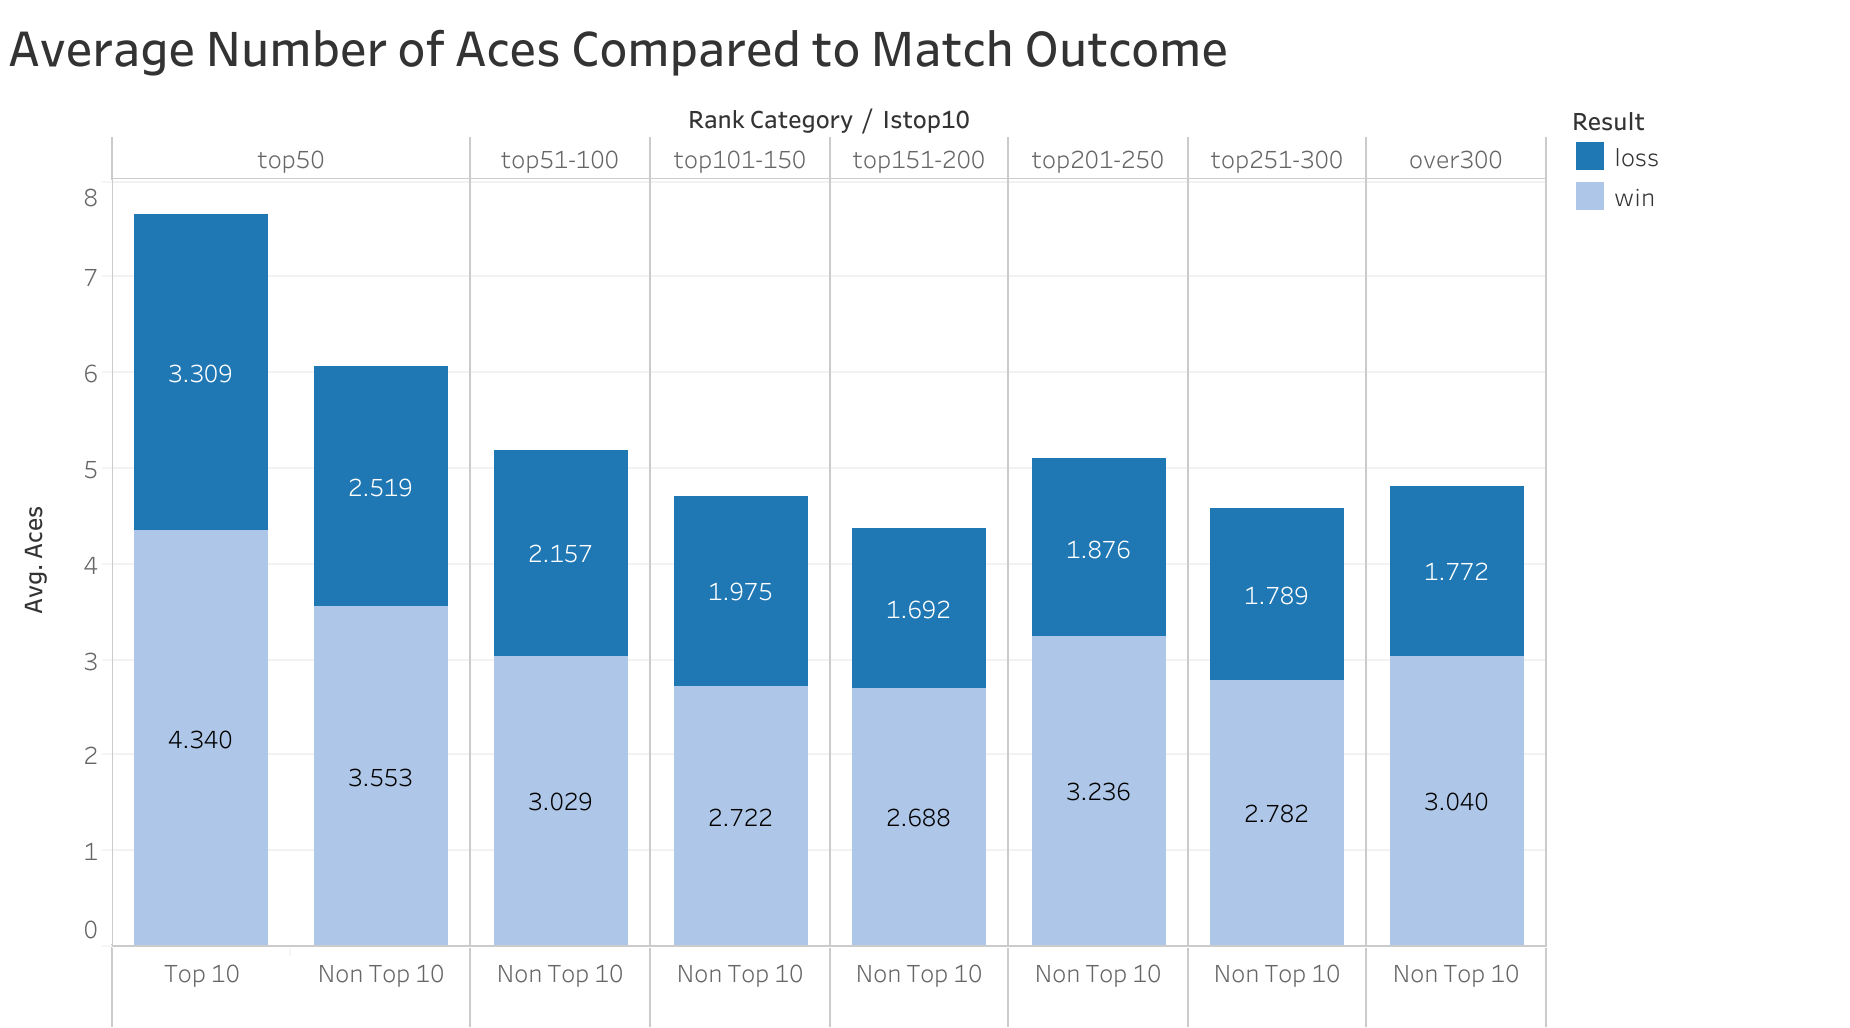

Throughout all rankings, we can see that the matches that were won resulted in having a **slightly higher** number of aces. We see this most present within the top 10 ranked players.  

### Service Games Won
Service Games wons are games within a match where the player who is currently serving, wins that game.


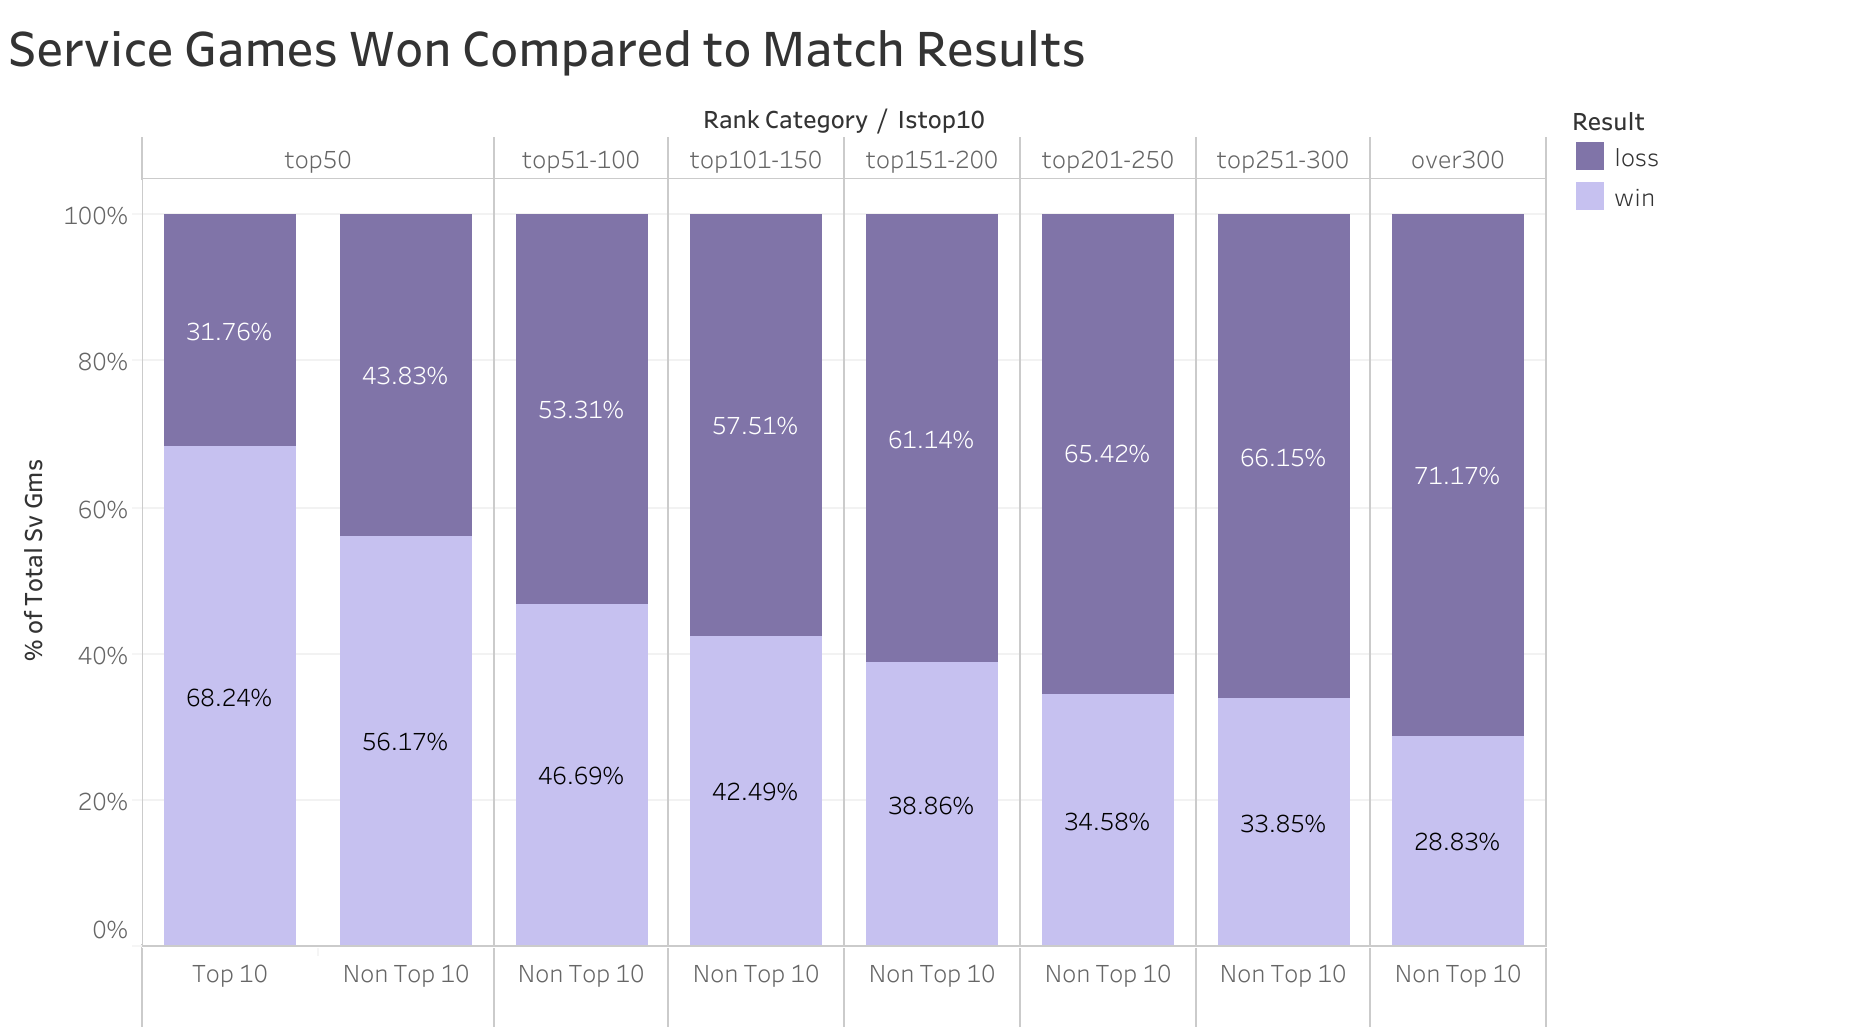

Throughout a match, we can make a clear distinction that those within the top 10, **68% have been able to hold their service games** which is extremely significant when evaluating the effectiveness of their serve. 


## Conclusions: What does it take to be in the top 10?


### 1. Experience:
We do find the 10 top ranked players being slightly older than the overall average age. 

### 2. Mental Toughness: 
In a 3rd set match, 59% top 10 players were able to comeback to win compared to 49% of non-top 10 players. Additionally, a higher percentage of breakpoints saved exists within the top 10 ranked player at 62%. We can conclude that mental resilience is a characteristic when comparing different ranking categories. 

### Serves: 
68% of top 10 players had the ability to win their service games, a noticeable difference between other ranking categories. We can confidently conclude that top 10 players serving ability is an important feature within this ranking category. Additionally, we find that top 10 players had a slightly higher average in aces. 



### Next Steps?

While the dataset did have many different features to analyze, it did leave out some points of data that would further assist in making conclusions among those ranked in the Top 10. The  following would be needed:

- Number of rallies within each point (duration of the point)
- Return games won (analyzing defensive skills)
- Number of unforced errors (to measure consistency)
- Number of winners and what type (forehand vs backhand strengths)
